<a href="https://colab.research.google.com/github/shqtbz143/202135992/blob/202135992-%EC%95%88%EC%84%9C%ED%98%84/9_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split

(train_input ,train_target), (test_input, test_target) = imdb.load_data(num_words=500)

train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

17464789/17464789 [==============================] - 0s 0us/step


In [2]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [3]:
from tensorflow import keras


model = keras.Sequential()
model.add(keras.layers.Embedding(500, 16, input_length=100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [4]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 8809 (34.41 KB)
Trainable params: 8809 (34.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [5]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy',
             metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5')

early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                 restore_best_weights=True)

history = model.fit(train_seq, train_target, epochs=100, batch_size=64,
                   validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 20s 53ms/step - loss: 0.6925 - accuracy: 0.5383 - val_loss: 0.6917 - val_accuracy: 0.5780
Epoch 2/100
  4/313 [..............................] - ETA: 13s - loss: 0.6909 - accuracy: 0.6055

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 15s 47ms/step - loss: 0.6908 - accuracy: 0.5901 - val_loss: 0.6896 - val_accuracy: 0.6140
Epoch 3/100
313/313 [==============================] - 15s 49ms/step - loss: 0.6873 - accuracy: 0.6251 - val_loss: 0.6842 - val_accuracy: 0.6464
Epoch 4/100
313/313 [==============================] - 16s 51ms/step - loss: 0.6761 - accuracy: 0.6644 - val_loss: 0.6626 - val_accuracy: 0.6912
Epoch 5/100
313/313 [==============================] - 15s 48ms/step - loss: 0.6159 - accuracy: 0.7085 - val_loss: 0.5829 - val_accuracy: 0.7100
Epoch 6/100
313/313 [==============================] - 14s 46ms/step - loss: 0.5638 - accuracy: 0.7266 - val_loss: 0.5544 - val_accuracy: 0.7320
Epoch 7/100
313/313 [==============================] - 14s 46ms/step - loss: 0.5374 - accuracy: 0.7502 - val_loss: 0.5300 - val_accuracy: 0.7544
Epoch 8/100
313/313 [==============================] - 15s 49ms/step - loss: 0.5161 - accuracy: 0.7632 - val_loss: 0.5132 - val_accuracy: 0.76

NameError: ignored

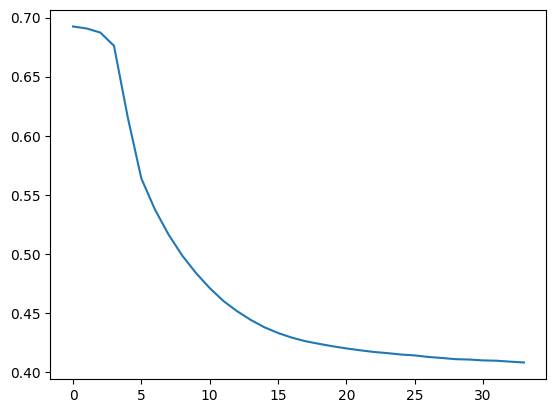

In [6]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(histpry.history['va;_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [7]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.LSTM(8, dropout=0.3))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy',
             metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dropout-model.h5')

early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                 restore_best_weights=True)

history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,
                   validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 25s 71ms/step - loss: 0.6924 - accuracy: 0.5433 - val_loss: 0.6918 - val_accuracy: 0.5976
Epoch 2/100
  3/313 [..............................] - ETA: 11s - loss: 0.6921 - accuracy: 0.5885

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 16s 50ms/step - loss: 0.6908 - accuracy: 0.5940 - val_loss: 0.6891 - val_accuracy: 0.6340
Epoch 3/100
313/313 [==============================] - 19s 60ms/step - loss: 0.6863 - accuracy: 0.6298 - val_loss: 0.6820 - val_accuracy: 0.6564
Epoch 4/100
313/313 [==============================] - 17s 55ms/step - loss: 0.6712 - accuracy: 0.6737 - val_loss: 0.6529 - val_accuracy: 0.6940
Epoch 5/100
313/313 [==============================] - 18s 57ms/step - loss: 0.6221 - accuracy: 0.7086 - val_loss: 0.5971 - val_accuracy: 0.7146
Epoch 6/100
313/313 [==============================] - 16s 52ms/step - loss: 0.5864 - accuracy: 0.7242 - val_loss: 0.5717 - val_accuracy: 0.7318
Epoch 7/100
 11/313 [>.............................] - ETA: 19s - loss: 0.5984 - accuracy: 0.7003

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()


In [ ]:
model3 = keras.Sequential()
model3.add(keras.layers.Embedding(500, 16, input_length=100))
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
model3.add(keras.layers.LSTM(8, dropout=0.3))
model3.add(keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
model3.summary()

In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model3.compile(optimizer=rmsprop, loss='binary_crossentropy',
             metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2rnn-model.h5')

early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                 restore_best_weights=True)

history = model3.fit(train_seq, train_target, epochs=100, batch_size=64,
                   validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
model4 = keras.Sequential()
model4.add(keras.layers.Embedding(500, 16, input_length=100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1, activation='sigmoid'))


In [ ]:
model4.summary()


In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model4.compile(optimizer=rmsprop, loss='binary_crossentropy',
             metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.h5')

early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                 restore_best_weights=True)

history = model4.fit(train_seq, train_target, epochs=100, batch_size=64,
                   validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])